# Netflix Show Analysis

To analyse the data provided using concepts of numpy, pandas, matplotlib and seaborn. The project aims to 

- Explore the various types of shows available in netflix
- Categorize them as TV shows and Movies
- Analyze the duration of movies with respect to the year of release
- Analyze what fraction of the shows are not suitable for children

## Downloading the Dataset

The dataset has been obtained from kaggle and is downloaded using the opendatasets python library

In [1]:
!pip install jovian opendatasets --upgrade --quiet

Let's begin by downloading the data, and listing the files within the dataset.

In [2]:
dataset_url = 'https://www.kaggle.com/datasets/shivamb/netflix-shows'

In [3]:
import opendatasets as od
od.download(dataset_url)

Skipping, found downloaded files in "./netflix-shows" (use force=True to force download)


The dataset has been downloaded and extracted.

In [4]:
data_dir = './netflix-shows'

In [5]:
import os
os.listdir(data_dir)

['netflix_titles.csv']

Let us save and upload our work to Jovian before continuing.

In [6]:
project_name = "netflix-show-analysis" # change this (use lowercase letters and hyphens only)

In [7]:
!pip install jovian --upgrade -q

In [8]:
import jovian

In [9]:
jovian.commit(project=project_name)

<IPython.core.display.Javascript object>

[jovian] Updating notebook "smritivm/netflix-show-analysis" on https://jovian.ai
[jovian] Committed successfully! https://jovian.ai/smritivm/netflix-show-analysis


'https://jovian.ai/smritivm/netflix-show-analysis'

## Data Preparation and Cleaning

The data is loaded onto a csv file and parsed to see how many rows, columns and empty values are present.
Rows which have certain null values that may interfere with our analysis are removed while certain others are replaced inplace
We make separate dataframes for movies and tv shows
Due to the variations in the format for duration, we standardize the duration format for movies and tv shows in their separate dataframes



In [10]:
import pandas as pd

In [11]:
netflix_df = pd.read_csv('netflix-shows/netflix_titles.csv')

In [12]:
netflix_df

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...
...,...,...,...,...,...,...,...,...,...,...,...,...
8802,s8803,Movie,Zodiac,David Fincher,"Mark Ruffalo, Jake Gyllenhaal, Robert Downey J...",United States,"November 20, 2019",2007,R,158 min,"Cult Movies, Dramas, Thrillers","A political cartoonist, a crime reporter and a..."
8803,s8804,TV Show,Zombie Dumb,NaN,NaN,NaN,"July 1, 2019",2018,TV-Y7,2 Seasons,"Kids' TV, Korean TV Shows, TV Comedies","While living alone in a spooky town, a young g..."
8804,s8805,Movie,Zombieland,Ruben Fleischer,"Jesse Eisenberg, Woody Harrelson, Emma Stone, ...",United States,"November 1, 2019",2009,R,88 min,"Comedies, Horror Movies",Looking to survive in a world taken over by zo...
8805,s8806,Movie,Zoom,Peter Hewitt,"Tim Allen, Courteney Cox, Chevy Chase, Kate Ma...",United States,"January 11, 2020",2006,PG,88 min,"Children & Family Movies, Comedies","Dragged from civilian life, a former superhero..."


In [13]:
netflix_df.describe()

,release_year
count,8807.000000
mean,2014.180198
std,8.819312
min,1925.000000
25%,2013.000000
50%,2017.000000
75%,2019.000000
max,2021.000000


In [14]:
netflix_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8807 entries, 0 to 8806
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       8807 non-null   object
 1   type          8807 non-null   object
 2   title         8807 non-null   object
 3   director      6173 non-null   object
 4   cast          7982 non-null   object
 5   country       7976 non-null   object
 6   date_added    8797 non-null   object
 7   release_year  8807 non-null   int64 
 8   rating        8803 non-null   object
 9   duration      8804 non-null   object
 10  listed_in     8807 non-null   object
 11  description   8807 non-null   object
dtypes: int64(1), object(11)
memory usage: 825.8+ KB


In [15]:
netflix_df.duplicated().sum()

0

In [16]:
#We check to see if there are any null values in the columns and if so, modify them
netflix_df.isnull().sum()

show_id            0
type               0
title              0
director        2634
cast             825
country          831
date_added        10
release_year       0
rating             4
duration           3
listed_in          0
description        0
dtype: int64

The cells will NaN values are modified in place with values stating their absence

In [65]:
netflix_df['director'].fillna('No Director', inplace = True)
netflix_df['cast'].fillna('No Cast', inplace = True)
netflix_df['country'].fillna('Country unavailable', inplace = True)
netflix_df['rating'].fillna('NIL', inplace = True)

In [85]:
#Cleaning the data by removing the rows without date_added and duration
netflix_df.dropna(subset = ['date_added', 'duration'], inplace = True)

In [86]:
netflix_df.isna().any()

show_id         False
type            False
title           False
director        False
cast            False
country         False
date_added      False
release_year    False
rating          False
duration        False
listed_in       False
description     False
dtype: bool

In [87]:
#Making a dataframe for only movies
netflix_movies = netflix_df[netflix_df['type'] == 'Movie'].copy()

In [88]:
#Making a dataframe for only TV Shows
netflix_tvshows = netflix_df[netflix_df['type'] == 'TV Show'].copy()

In [89]:
netflix_movies.duration = netflix_movies.duration.str.replace(' min', '').astype(int)

In [99]:
netflix_tvshows.rename(columns = {'duration' : 'seasons'}, inplace = True)
netflix_tvshows.replace({'seasons':{'1 Season':'1 Seasons'}}, inplace=True)
netflix_tvshows.seasons = netflix_tvshows.seasons.str.replace(' Seasons', '').astype(int)

In [101]:
jovian.commit()

<IPython.core.display.Javascript object>

[jovian] Updating notebook "smritivm/netflix-show-analysis" on https://jovian.ai
[jovian] Committed successfully! https://jovian.ai/smritivm/netflix-show-analysis


'https://jovian.ai/smritivm/netflix-show-analysis'

## Exploratory Analysis and Visualization

We take turns visualizing the data in certain columns, finding out the predominant categories and analysing in general


Let's begin by importing`matplotlib.pyplot` and `seaborn`.

In [102]:
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline

sns.set_style('darkgrid')
matplotlib.rcParams['font.size'] = 14
matplotlib.rcParams['figure.figsize'] = (9, 5)
matplotlib.rcParams['figure.facecolor'] = '#00000000'

**Plotting a graph of release year and number of titles released**

The graph clearly shows how most of the shows present on netflix were released between 2000 and 2020

In [105]:
release_years_data = dict(netflix_df.groupby('release_year')['title'].count())

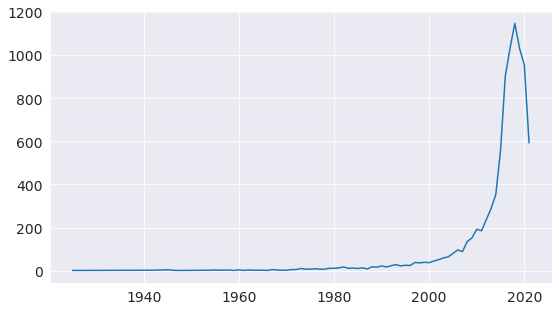

In [106]:
plt.plot(release_years_data.keys(), release_years_data.values())

**Plotting a graph of rating vs. count** 

From the graph, we can infer that maximum number of shows fall under the rating of TV - MA

In [107]:
rating_data = netflix_df.groupby('rating')['title'].count()
rating_data

rating
G             41
NC-17          3
NIL            4
NR            79
PG           287
PG-13        490
R            799
TV-14       2157
TV-G         220
TV-MA       3205
TV-PG        861
TV-Y         306
TV-Y7        333
TV-Y7-FV       6
UR             3
Name: title, dtype: int64

In [108]:
rating_data = dict(netflix_df.groupby('rating')['title'].count())

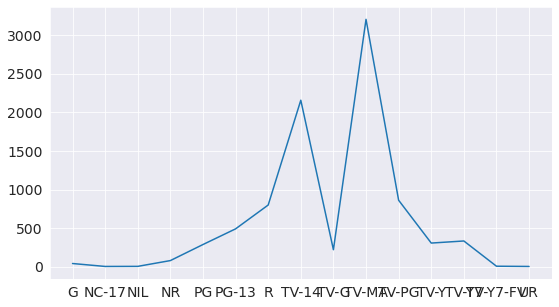

In [109]:
plt.plot(rating_data.keys(), rating_data.values())

**Comparing total number of movies and TV shows** 

We are going to compare and find out how many movies and tv shows are present

<AxesSubplot:xlabel='type', ylabel='count'>

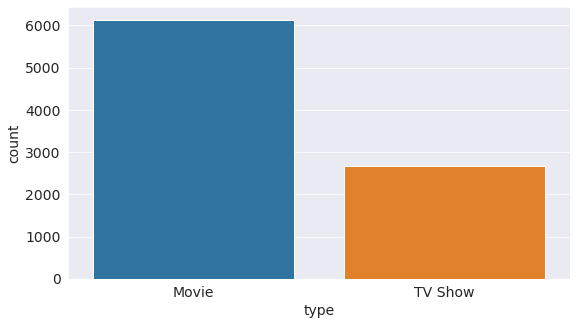

In [196]:
sns.countplot(x = netflix_df.type)

From the countplot it is pretty clear that netflix is a home to more movies than TV shows

**Ratings vs TV shows** 

The ratings of TV Shows is plotted to find out which rating predominates

<AxesSubplot:xlabel='rating', ylabel='count'>

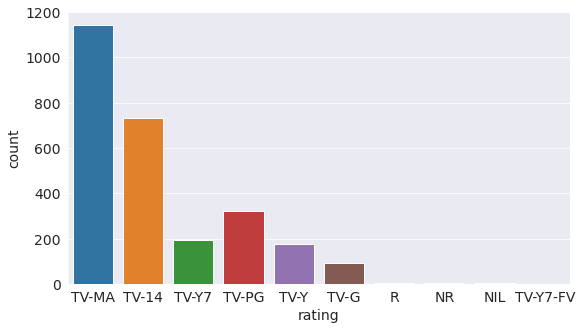

In [195]:
sns.countplot(x = netflix_tvshows.rating)

The rating TV - MA is predominant, similar to the case of the rating analysis for the whole dataset but here we can notice that the number of shows rated 'R', 'NR' and 'TV-Y7-FV' is pretty negligible

**Percentage of long and short movies** 

Here we classify movies as long ( > 150 mins) and short (<= 150 mins) and then analyze to find out the percentage of movies belonging in each category

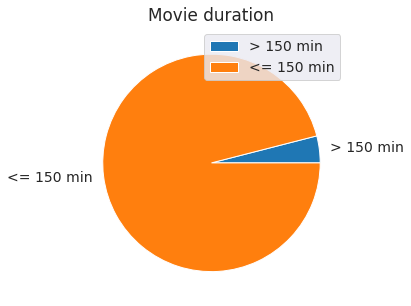

In [138]:
long_movies = netflix_movies[netflix_movies['duration'] > 150]
short_movies = netflix_movies[netflix_movies['duration'] <= 150]

plt.title('Movie duration')
plt.pie([long_movies.shape[0], short_movies.shape[0]], labels = ['> 150 min', '<= 150 min'])
plt.legend()

Let us save and upload our work to Jovian before continuing

In [140]:
import jovian

In [141]:
jovian.commit()

<IPython.core.display.Javascript object>

[jovian] Updating notebook "smritivm/netflix-show-analysis" on https://jovian.ai
[jovian] Committed successfully! https://jovian.ai/smritivm/netflix-show-analysis


'https://jovian.ai/smritivm/netflix-show-analysis'

## Asking and Answering Questions

TODO - write some explanation here.



> Instructions (delete this cell)
>
> - Ask at least 5 interesting questions about your dataset
> - Answer the questions either by computing the results using Numpy/Pandas or by plotting graphs using Matplotlib/Seaborn
> - Create new columns, merge multiple dataset and perform grouping/aggregation wherever necessary
> - Wherever you're using a library function from Pandas/Numpy/Matplotlib etc. explain briefly what it does



#### Q1:Which are the top countries that produce movies?

In [160]:
netflix_movies['country'].unique()

array(['United States', 'Country unavailable',
       'United States, Ghana, Burkina Faso, United Kingdom, Germany, Ethiopia',
       'Germany, Czech Republic', 'India', 'United States, India, France',
       'China, Canada, United States',
       'South Africa, United States, Japan', 'Japan', 'Nigeria',
       'Spain, United States', 'France', 'United Kingdom, United States',
       'United Kingdom, Australia, France',
       'United Kingdom, Australia, France, United States',
       'United States, Canada', 'Germany, United States',
       'South Africa, United States', 'United States, Mexico',
       'United States, Italy, France, Japan',
       'United States, Italy, Romania, United Kingdom',
       'Australia, United States', 'Argentina, Venezuela',
       'United States, United Kingdom, Canada', 'China, Hong Kong',
       'Canada', 'Hong Kong', 'United States, China, Hong Kong',
       'Italy, United States', 'United States, Germany',
       'United Kingdom, Canada, United States

The countries for each movie are listed separated by commas and multiple countries are listed in a single line. This means that 'United States' and 'United States, Ghana, Burkina Faso, United Kingdom, Germany, Ethiopia' are considered separate entries even though United States is common.

So to analyze them we need to generate a separate dictionary to maintain the count of each country

In [154]:
countries = list(netflix_movies['country'])
unique_countries = {}
for line in countries:
    places = line.split(', ')
    for place in places:
        if place not in unique_countries:
            unique_countries[place] = 1
        else:
            unique_countries[place] += 1


This dictionary generated is not the ideal way pandas stores information, so we have to convert it to a suitable format

In [155]:
def convert_pandas_frame(unique_countries: dict) -> dict:
    pandas_frame = {}
    countries = []
    movies = []
    for country in unique_countries:
        countries.append(country)
        movies.append(unique_countries[country])
    pandas_frame['country'] = countries
    pandas_frame['movies'] = movies
    return pandas_frame

In [168]:
countries_df = pd.DataFrame(convert_pandas_frame(unique_countries))
countries_df

,country,movies
0,United States,2748
1,Country unavailable,440
2,Ghana,5
3,Burkina Faso,1
4,United Kingdom,532
...,...,...
118,Sudan,1
119,Panama,1
120,Uganda,1
121,East Germany,1


As we can see, the value for 'Country unavailable' is pretty high but cannot be used for our analysis. Thus, we need to drop that particular row

In [169]:
countries_unavailable = countries_df[countries_df['country'] == 'Country unavailable'].index
countries_df.drop(countries_unavailable, inplace = True)

In [175]:
top10_countries = countries_df.sort_values('movies', ascending = False).head(10)
top10_countries

,country,movies
0,United States,2748
8,India,962
4,United Kingdom,532
11,Canada,319
9,France,303
5,Germany,182
15,Spain,171
13,Japan,119
10,China,114
17,Mexico,111


This command returns or top ten countries. As it is evident from the statistics, United States tops this list followed by India and the UK.

Now let us try analyzing the same through a bar graph

<BarContainer object of 10 artists>

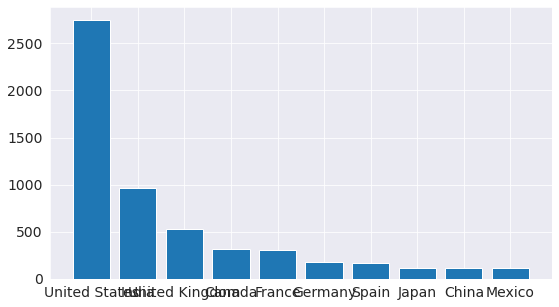

In [179]:
plt.bar(top10_countries.country, top10_countries.movies)

#### Q2: List the top 10 directors of PG movies/shows

<AxesSubplot:xlabel='count'>

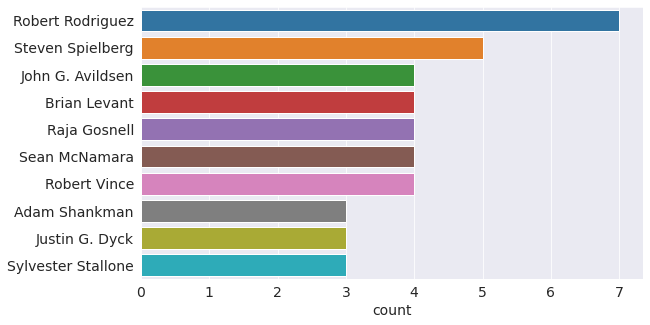

In [191]:
pg_rated = netflix_df[netflix_df['rating'] == 'PG']
pg_rated_directors = pg_rated[pg_rated.director != 'No Director'].set_index('title').director.str.split(', ', expand=True).stack().reset_index(level=1, drop=True)
sns.countplot(y = pg_rated_directors, order=pg_rated_directors.value_counts().index[:10])

We can see that Robert Rodriguez directs the maximum number of PG rated movies/TV shows on Netflix

#### Q3: Which are the shows that have maximum number of seasons?

In [200]:
max_seasons = netflix_tvshows.sort_values('seasons', ascending = False).head(10)
max_seasons

,show_id,type,title,director,cast,country,date_added,release_year,rating,seasons,listed_in,description
548,s549,TV Show,Grey's Anatomy,No Director,"Ellen Pompeo, Sandra Oh, Katherine Heigl, Just...",United States,"July 3, 2021",2020,TV-14,17,"Romantic TV Shows, TV Dramas",Intern (and eventual resident) Meredith Grey f...
2423,s2424,TV Show,Supernatural,Phil Sgriccia,"Jared Padalecki, Jensen Ackles, Mark Sheppard,...","United States, Canada","June 5, 2020",2019,TV-14,15,"Classic & Cult TV, TV Action & Adventure, TV H...","Siblings Dean and Sam crisscross the country, ..."
4798,s4799,TV Show,NCIS,No Director,"Mark Harmon, Michael Weatherly, Pauley Perrett...",United States,"July 1, 2018",2017,TV-14,15,"Crime TV Shows, TV Dramas, TV Mysteries",Follow the quirky agents of the NCIS – the Nav...
4220,s4221,TV Show,COMEDIANS of the world,No Director,"Neal Brennan, Chris D'Elia, Nicole Byer, Nick ...",United States,"January 1, 2019",2019,TV-MA,13,"Stand-Up Comedy & Talk Shows, TV Comedies",This global stand-up comedy series features a ...
1354,s1355,TV Show,Heartland,No Director,"Amber Marshall, Michelle Morgan, Graham Wardle...",Canada,"February 1, 2021",2019,TV-14,13,TV Dramas,Spunky teenager Amy is reeling from the sudden...
4964,s4965,TV Show,Trailer Park Boys,No Director,"Mike Smith, John Paul Tremblay, Robb Wells, Jo...",Canada,"March 30, 2018",2018,TV-MA,12,"Classic & Cult TV, Crime TV Shows, Internation...",Follow the booze-fueled misadventures of three...
5412,s5413,TV Show,Criminal Minds,No Director,"Mandy Patinkin, Joe Mantegna, Thomas Gibson, S...","United States, Canada","June 30, 2017",2017,TV-14,12,"Crime TV Shows, TV Dramas, TV Mysteries",This intense police procedural follows a group...
6456,s6457,TV Show,Cheers,No Director,"Ted Danson, Rhea Perlman, George Wendt, John R...",United States,"July 1, 2017",1992,TV-PG,11,"Classic & Cult TV, TV Comedies","Sam Malone, an ex-baseball player turned bar o..."
390,s391,TV Show,The Walking Dead,No Director,"Andrew Lincoln, Steven Yeun, Norman Reedus, Ch...",United States,"July 26, 2021",2019,TV-MA,10,"Classic & Cult TV, TV Action & Adventure, TV D...","In the wake of a zombie apocalypse, survivors ..."
1622,s1623,TV Show,Stargate SG-1,No Director,"Richard Dean Anderson, Michael Shanks, Amanda ...","United States, Canada","December 1, 2020",2006,TV-MA,10,"Classic & Cult TV, TV Action & Adventure, TV S...",Stargate Command roars into action when Jack O...


<AxesSubplot:xlabel='seasons', ylabel='title'>

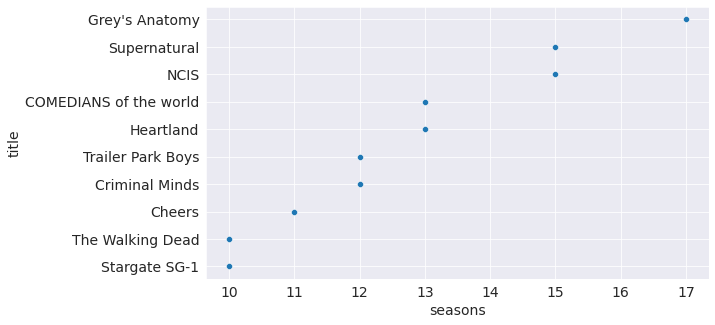

In [203]:
sns.scatterplot(x = max_seasons.seasons, y = max_seasons.title)

Grey's Anatomy seems to be a humongous series spanning 17 seasons. Supernatural and NCIS are not far behind with 15 seasons each

#### Q4: Which are the most popular Indian actors on Netflix?

In [227]:
filtered_cast = netflix_df[netflix_df.cast != 'No Cast'].set_index('title').cast.str.split(', ', expand=True).stack().reset_index(level=1, drop=True)
filtered_country = netflix_df[netflix_df.country != 'Country Unavailable'].set_index('title').country.str.split(', ', expand=True).stack().reset_index(level=1, drop=True)
filtered_cast_country = pd.DataFrame(filtered_cast).merge(pd.DataFrame(filtered_country), on = 'title')
filtered_cast_country.rename(columns = {'0_x' : 'Cast', '0_y' : 'Country'})

,Cast,Country
title,,
Blood & Water,Ama Qamata,South Africa
Blood & Water,Khosi Ngema,South Africa
Blood & Water,Gail Mabalane,South Africa
Blood & Water,Thabang Molaba,South Africa
Blood & Water,Dillon Windvogel,South Africa
...,...,...
Zubaan,Manish Chaudhary,India
Zubaan,Meghna Malik,India
Zubaan,Malkeet Rauni,India


<AxesSubplot:xlabel='count', ylabel='0_x'>

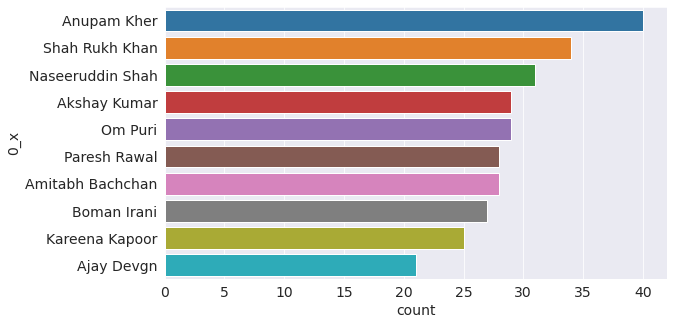

In [242]:
filtered_indian_cast = filtered_cast_country[filtered_cast_country['0_y'] == 'India']
filtered_indian_cast = filtered_indian_cast['0_x']
sns.countplot(y = filtered_indian_cast, order = filtered_indian_cast.value_counts().index[:10])

Anupam Kher is the actor with most movies/ tv shows on netflix. Shah Rukh Khan and Naseeruddin Shah follow close by

#### Q5: List all Reality TV Shows available on Netflix

In [249]:
filtered_shows = pd.DataFrame(netflix_tvshows.set_index('title').listed_in.str.split(', ', expand=True).stack().reset_index(level=1, drop=True))

In [251]:
filtered_shows

,0
title,
Blood & Water,International TV Shows
Blood & Water,TV Dramas
Blood & Water,TV Mysteries
Ganglands,Crime TV Shows
Ganglands,International TV Shows
...,...
Zindagi Gulzar Hai,Romantic TV Shows
Zindagi Gulzar Hai,TV Dramas
Zombie Dumb,Kids' TV


In [253]:
reality_tvshows = filtered_shows[filtered_shows[0] == 'Reality TV']
reality_tvshows

,0
title,
Jailbirds New Orleans,Reality TV
The Great British Baking Show,Reality TV
Love on the Spectrum,Reality TV
Nailed It,Reality TV
Too Hot To Handle: Latino,Reality TV
...,...
The Kindness Diaries,Reality TV
The Rap Game,Reality TV
Top Grier,Reality TV


Let us save and upload our work to Jovian before continuing.

In [255]:
import jovian

In [256]:
jovian.commit()

<IPython.core.display.Javascript object>

[jovian] Updating notebook "smritivm/netflix-show-analysis" on https://jovian.ai
[jovian] Committed successfully! https://jovian.ai/smritivm/netflix-show-analysis


'https://jovian.ai/smritivm/netflix-show-analysis'

## Inferences and Conclusion

It can be infered that Netflix is a huge platform which has been rising in the past decade as a home to numerous Movies and TV Shows. Netflix is a platform home to may native and international shows. 

A large proportion of the shows are Movies and again a large proportion is rated TV-MA. The movies on Netflix show a general trend of being greater than 1 and a half hours.

The maximum number of PG rated shows on Netflix is directed by Robert Rodriguez

The United States is the leading country in terms of content on Netflix followed by India. In India, actors are widely popular, Anupam Kher being the one with most shows on the platform.


Coming to TV Shows spanning several seasons, Grey's Anatomy seems to be the most popular spanning 17 seasons so far.

It can be concluded that the vast platform that is Netflix is nothing short of a miracle data hub and a huge space for national and international promotion


In [257]:
import jovian

In [258]:
jovian.commit()

<IPython.core.display.Javascript object>

[jovian] Updating notebook "smritivm/netflix-show-analysis" on https://jovian.ai
[jovian] Committed successfully! https://jovian.ai/smritivm/netflix-show-analysis


'https://jovian.ai/smritivm/netflix-show-analysis'

## References and Future Work

> References
> - https://pandas.pydata.org/docs/index.html
> - https://matplotlib.org/stable/index.html
> - https://seaborn.pydata.org/index.html
> - https://jovian.ai/allenkong221/netflix-movies-and-tv-shows-project

> Future Work
> - Analyze date released and trends in the subsequent years
> - Analyze popularity among other genres


In [259]:
import jovian

In [260]:
jovian.commit()

<IPython.core.display.Javascript object>

[jovian] Updating notebook "smritivm/netflix-show-analysis" on https://jovian.ai
[jovian] Committed successfully! https://jovian.ai/smritivm/netflix-show-analysis


'https://jovian.ai/smritivm/netflix-show-analysis'